In [77]:
import numpy as np
import matplotlib.pyplot as plt
import essentia
import essentia.standard

<IPython.core.display.Javascript object>


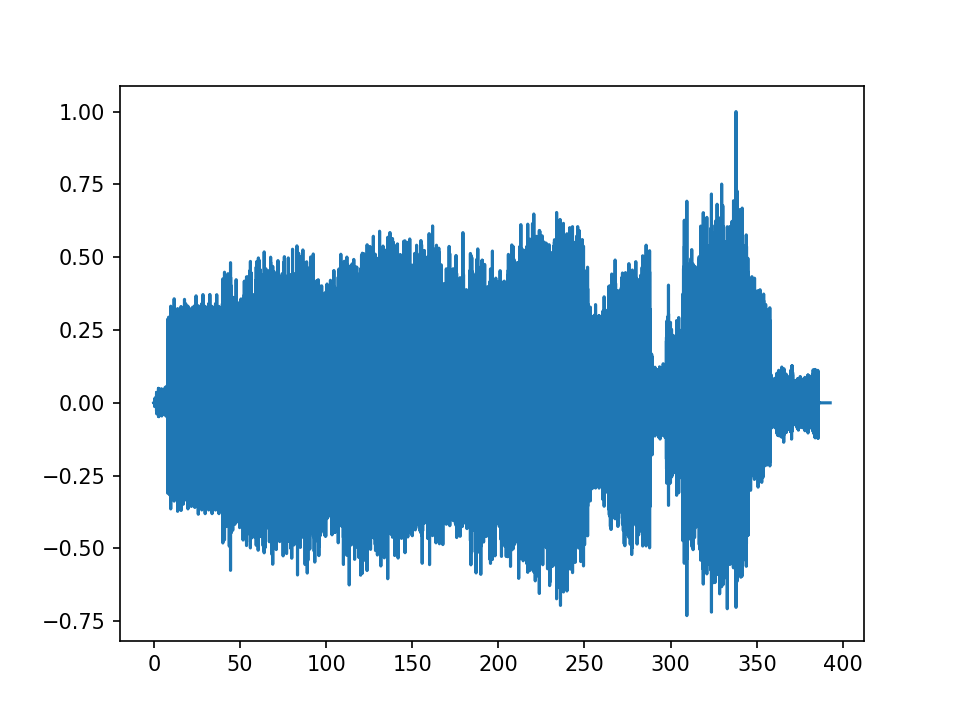

In [101]:
loader = essentia.standard.MonoLoader(filename='/home/illy/gdrive/aniproj/media_archive/BASS_DRUMS.mp3') # load audio with 44100Hz sample rate downmixed to mono
audio = loader() # load from loader to np ndarray
# audio = audio[np.arange(44100*10)] # take only the first N seconds of the audio
audio = audio/np.max(np.abs(audio))
F = 44100 #[Hz]
dT = 1/F 
N = int(len(audio))
T = np.linspace(0, (N-1)*dT, N)
plt.plot(T, audio)
plt.show()

In [94]:
lenframe = int(512)
i=0
Evec = np.array([])
while True:
    k = i*lenframe
    if k+lenframe > audio.size:
        Evec = np.append(Evec, 0.0*np.ones(audio.size-k))
        break
    frame = audio[np.arange(k, k+lenframe-1)]
    E = np.trapz(frame**2)/(lenframe) # integral over the squer of the value
    Evec = np.append(Evec, [E]*np.ones(lenframe))
    i += 1
Evec = Evec/np.max(Evec)
indxs = np.where(Evec>=0.15)
oneszeros = np.arange(Evec.size)*0.0
oneszeros[indxs] +=1

<IPython.core.display.Javascript object>


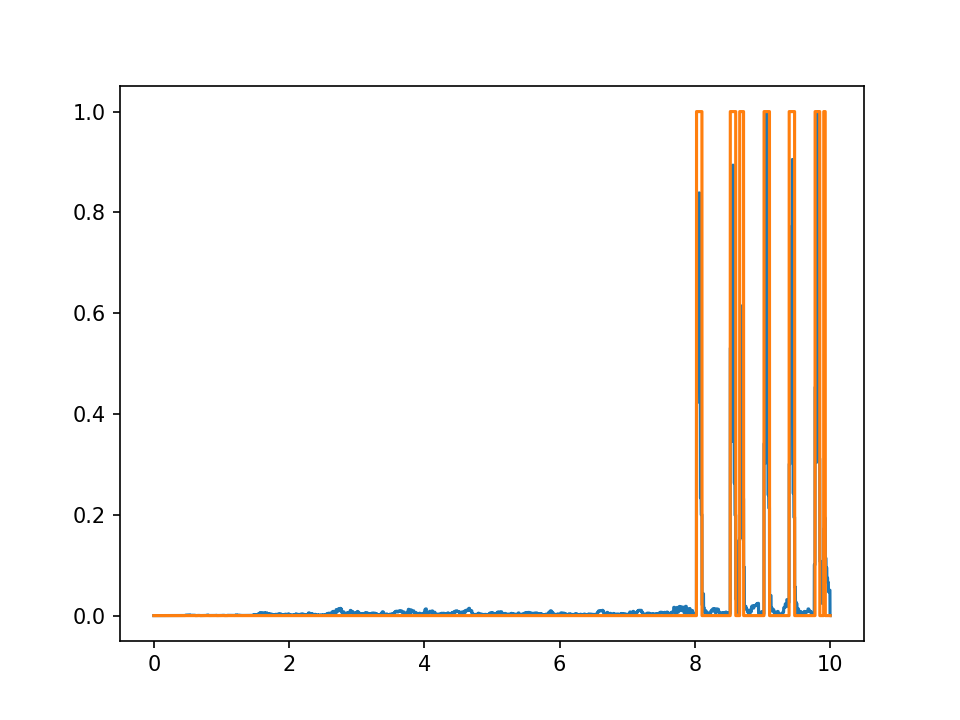

In [99]:
% matplotlib notebook
plt.plot(T, Evec);
plt.plot(T, oneszeros)
plt.show()

In [102]:
audio.size

17314560

In [104]:
17314560/44100/60

6.543673469387755